In [1]:
#%matplotlib inline
%matplotlib notebook
import numpy as np
import itertools
import logging

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d

from config import CFG
from kde_classes import Model, KDE

# Logging setup utilities
from debugging import (
    setup_logger,
    setup_console_handler
)

Welcome to JupyROOT 6.14/04


In [3]:
setup_logger('KDE', logging.DEBUG)
setup_console_handler('KDE', logging.DEBUG)

In [ ]:
#mc = np.load(CFG['paths']['mg_mc'])
model = Model('dec', mc=None, weighting=None)

In [ ]:
kde = KDE(model)

In [ ]:
# out_bins = []
# for i, key in enumerate(self.model.vars):
#     out_bins.append(np.linspace(self.model.ranges[i][0],
#                             self.model.ranges[i][1],
#                             self.model.nbins[i]))
coords = np.array([(-2, 30)]) #np.array(list(itertools.product(*out_bins)))
training_pdf_vals = np.asarray(
    [kde.eval_point(binned_kernel_density, coord) for coord in coords])
#training_pdf_vals = training_pdf_vals.reshape(self.model.nbins)

In [ ]:
training_pdf_vals

In [ ]:
adaptive = True
weighting = 'plotter_wkde'
gamma = 2.0
phi0 = 1.01

parameters_dir_format = '{kd}_{weighting}_gamma_{gamma}_phi0_{phi0}'
parameters_dir = parameters_dir_format.format(kd='adaptive_kd' if adaptive else
    'binned_kd', weighting=weighting, gamma=gamma, phi0=phi0)

In [ ]:
print(parameters_dir)

In [ ]:
test_l = 'a'

In [ ]:
test = list(test_l)

In [ ]:
test

In [ ]:
result = kde.cross_validate_split([0.05, 0.11], 0, adaptive=True, pdf_seed=None)
print(result)

In [ ]:
result['bandwidth'][0]

In [ ]:
for n_split in range(CFG['project']['n_splits']):
    result = kde.cross_validate_split([0.10], n_split, adaptive=True, pdf_seed=None)
    np.save("output/dec/temp/cv_1_{n_split}.npy".format(n_split=n_split), result)

In [ ]:
pdf_seed = kde.generate_binned_kd([0.05, 0.11])

In [ ]:
result = kde.cross_validate([0.05, 0.11], adaptive=True, pdf_seed=pdf_seed)
print(result)

In [ ]:
kde.model.approx_pdf = pdf_seed
result = kde.cross_validate([0.05, 0.11], adaptive=True, pdf_seed=None)
print(result)

In [ ]:
out_bins = []
for i, key in enumerate(model.vars):
    out_bins.append(np.linspace(model.ranges[i][0],
                                model.ranges[i][1],
                                model.nbins[i]))
coords = np.array(list(itertools.product(*out_bins)))
X, Y = np.meshgrid(*out_bins, indexing='ij')

In [ ]:
binned_kernel_density = kde.generate_binned_kd([0.06, 0.1])

In [ ]:
pdf_vals = np.asarray([kde.eval_point(binned_kernel_density, coord) for coord in coords])
pdf_vals = pdf_vals.reshape(model.nbins)

In [ ]:
plt.figure(figsize=(8, 8))

plt.pcolormesh(X, Y, pdf_vals)

In [ ]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, pdf_vals)
ax.set_xlabel('x, $\sigma=1$')
ax.set_ylabel('y, $\sigma=2$')

Generate adaptive kde

In [ ]:
adaptive_kernel_density = kde.generate_adaptive_kd([0.5, 0.6])

In [ ]:
adaptive_pdf_vals = np.asarray([kde.eval_point(adaptive_kernel_density, coord) for coord in coords])
adaptive_pdf_vals = adaptive_pdf_vals.reshape(model.nbins)

In [ ]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, adaptive_pdf_vals)
ax.set_xlabel('x, $\sigma=1$')
ax.set_ylabel('y, $\sigma=2$')

Plot mc data

In [ ]:
from dataset import load_and_prepare_data

mc = load_and_prepare_data(CFG['paths']['IC_mc'])

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111)
#h = ax.hist2d(mc['x'], mc['y'], bins=[100, 100], range=[[-5, 5], [-5, 5]])
h = ax.hist2d(np.log10(mc['sigma_pull_corrected']), mc['logE'], bins=[200, 100])
fig.colorbar(h[3], ax=ax)

In [ ]:
cv_result = kde.cross_validate([0.5, 0.5], adaptive=False)

In [ ]:
cv_result

In [ ]:
result = kde.cross_validate_bandwidths(bandwidths=[[0.5, 0.6], [0.6]], adaptive=True)

In [ ]:
result

In [ ]:
result[result['LLH'] == np.max(result['LLH'])]

In [ ]:
import timeit
timeit.timeit(stmt='kde.generate_adaptive_kd([0.4, 0.4])',
              setup='from kde_classes import Model, KDE; model = Model("sig_E", mc=None, weighting="ploter_wkde"); kde = KDE(model)',
              number=1)

Using approx_pdf: 52.749691009521484; 52.35630702972412

Using flat approx_pdf: 52.84272503852844

In [ ]:
import glob
import numpy as np

from config import CFG
from dataset import load_and_prepare_data
from kde_classes import Model, KDE

mc = np.load(CFG['paths']['mg_mc'])

model = Model('multi_gaussian', mc, weighting=None)
kde = KDE(model)

cv_files = glob.glob('output/multi_gaussian/cv_*.npy')
cv_results = np.array([], dtype=kde.cv_result.dtype)

print(kde.cv_result.dtype)
for cv_file in cv_files:
    cv_result = np.loadtxt(cv_file, dtype=kde.cv_result.dtype)
    cv_results = np.append(cv_results, re)

print(cv_results)

In [ ]:
f = np.load('output/sig_psi_E/cv/cv_31.npy')
f.dtype

## Compare cv files

In [ ]:
import glob
import numpy as np

from kde_classes import Model, KDE

model = Model('sig_E', mc=None, weighting='ploter_wkde')
kde = KDE(model)

cv_files = glob.glob('output/sig_E/cv/cv_*.npy')
cv_results = np.array([], dtype=kde.cv_result.dtype)

for cv_file in cv_files:
    cv_result = np.load(cv_file)
    cv_results = np.append(cv_results, cv_result)

result_max_LLH = cv_results[cv_results['LLH'] == np.max(cv_results['LLH'])]

bandwidth = [result_max_LLH[key] for key in model.bandwidth_vars]

In [ ]:
cv_results.dtype

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(cv_results['sigma_pull_corrected_bandwidth'], cv_results['log_e_bandwidth'],
           cv_results['LLH'], c=cv_results['LLH'], cmap='viridis')

In [ ]:
# New
print(result_max_LLH)
print(bandwidth)
print(cv_results)

In [ ]:
print(result_max_LLH)
print(bandwidth)

## Comparison of old vs new cv

In [ ]:
import cPickle as pickle

with open('/home/ge56lag/Software/KDE/output/sig_psi_E/pdf/sig_psi_E.pkl', 'rb') as f:
            sig_E = pickle.load(f)
with open('/home/ge56lag/Software/KDE/output/sig_psi_E/old/pdf/sig_psi_E.pkl', 'rb') as f:
            sig_E_old = pickle.load(f)
        
print(sig_E['bw'])
print(sig_E_old['bw'])

In [ ]:
result = kde.cross_validate([0.1, 0.17], adaptive=True, pdf_seed=None)
print(result)

result = kde.cross_validate([0.05, 0.11], adaptive=True, pdf_seed=None)
print(result)

In [ ]:
import cPickle as pickle

with open('/home/ge56lag/Software/KDE/output/sig_E/pdf/sig_E.pkl', 'rb') as f:
            sig_E = pickle.load(f)
with open('/home/ge56lag/Software/KDE/output/sig_psi_E/pdf/sig_psi_E.pkl', 'rb') as f:
            sig_psi_E = pickle.load(f)

In [ ]:
print(sig_E['bw'], sig_psi_E['bw'])

In [ ]:
plt.figure()

plt.pcolormesh(X, Y, sig_psi_E['pdf_vals'][:, :, 50])

In [ ]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, sig_psi_E['pdf_vals'][:, :, 10])
ax.set_xlabel('x')
ax.set_ylabel('y')

In [ ]:
bg['pdf_vals'][:, :, 0].shape

In [ ]:
eval(str("[2, 3]"))

In [ ]:
model.mc['sigma_pull_corrected']

In [ ]:
model.mc.dtype.names

In [ ]:
from dataset import load_and_prepare_data

mc = np.load('/home/ge56lag/Data/diffuse_mc_wBDT.npy')

In [ ]:
mc['sigma_pull_corrected_mu']

In [ ]:
mc.dtype.names

In [2]:
mc = np.load('/home/ge56lag/Data/diffuse_northern_tracks_MC_KDE/version-001-p00/dataset_8yr_fit_IC86_2012_16_MC_2017_09_29_more_fields.npy')

In [3]:
mc.dtype.names

('Run',
 'Event',
 'SubEvent',
 'MJD_day',
 'MJD_sec',
 'MJD_ns',
 'azimuth_MPEFit',
 'zenith_MPEFit',
 'zenith_MPEFit_exists',
 'zenith_MPEFit_fit_status',
 'energy_truncated',
 'energy_truncated_exists',
 'azimuth_ReReco',
 'zenith_ReReco',
 'zenith_ReReco_exists',
 'zenith_ReReco_fit_status',
 'sigma1',
 'sigma2',
 'sigmaOK',
 'trueAzi',
 'trueZen',
 'trueE',
 'trueType',
 'energy_truncated_fit_status',
 'nChannel',
 'orig_OW',
 'powerlaw',
 'azi',
 'zen',
 'mjd',
 'ra',
 'dec',
 'logE',
 'sigma',
 'trueRa',
 'trueDec',
 'conv',
 'prompt',
 'astro',
 'best_fit_OW',
 'sigma_pull_corrected',
 'psi',
 'logEt')

In [ ]:
cv = np.load('output/bg/cv/cv_0.npy')

In [ ]:
cv

In [9]:
from sklearn.neighbors.kde import KernelDensity
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

In [19]:
plt.style.use('ggplot')

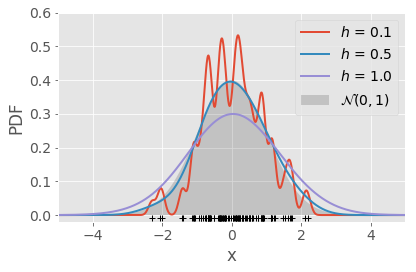

In [60]:
# Plot a 1D density example
plt.rcParams.update({'font.size': 14})

N = 100
np.random.seed(1)
X = np.random.normal(0, 1, N)[:, np.newaxis]

X_plot = np.linspace(-5, 5, 1000)[:, np.newaxis]

true_dens = norm(0, 1).pdf(X_plot[:, 0])

fig, ax = plt.subplots()
ax.fill(X_plot[:, 0], true_dens, fc='black', alpha=0.15,
        label='$\mathcal{N}(0, 1)$')

kernel='gaussian'
bws = [0.1, 0.5, 1.0]
for bw in bws:
    kde = KernelDensity(kernel=kernel, bandwidth=bw).fit(X)
    log_dens = kde.score_samples(X_plot)
    ax.plot(X_plot[:, 0], np.exp(log_dens), '-', linewidth=2,
            label='$h$ = {}'.format(bw))

ax.legend(loc='upper right')
ax.plot(X[:, 0], -0.01*np.ones_like(X[:, 0]), '+k')# - 0.01 * np.random.random(X.shape[0]), '+k')

ax.set_xlim(-5, 5)
ax.set_ylim(-0.02, 0.6)
ax.set_xlabel('x')
ax.set_ylabel('PDF')
plt.tight_layout()
plt.show()
fig.savefig('./output/kernel_bw_example.pdf', dpi=300)